# Timeseries CPD with Ruptures Adapter and Comparison with ClaSP



### Prerequisites

In [1]:
import time

from sktime.annotation.adapters._ruptures import (
    RupturesBinsegCPD,
    RupturesKernelCPD,
    RupturesWindowCPD,
)
from sktime.annotation.plotting.utils import plot_time_series_with_change_points
from sktime.datasets import load_electric_devices_segmentation

The following use case shows an energy profile of electric household devices with four change points indicating different operational states or plugged household devices.

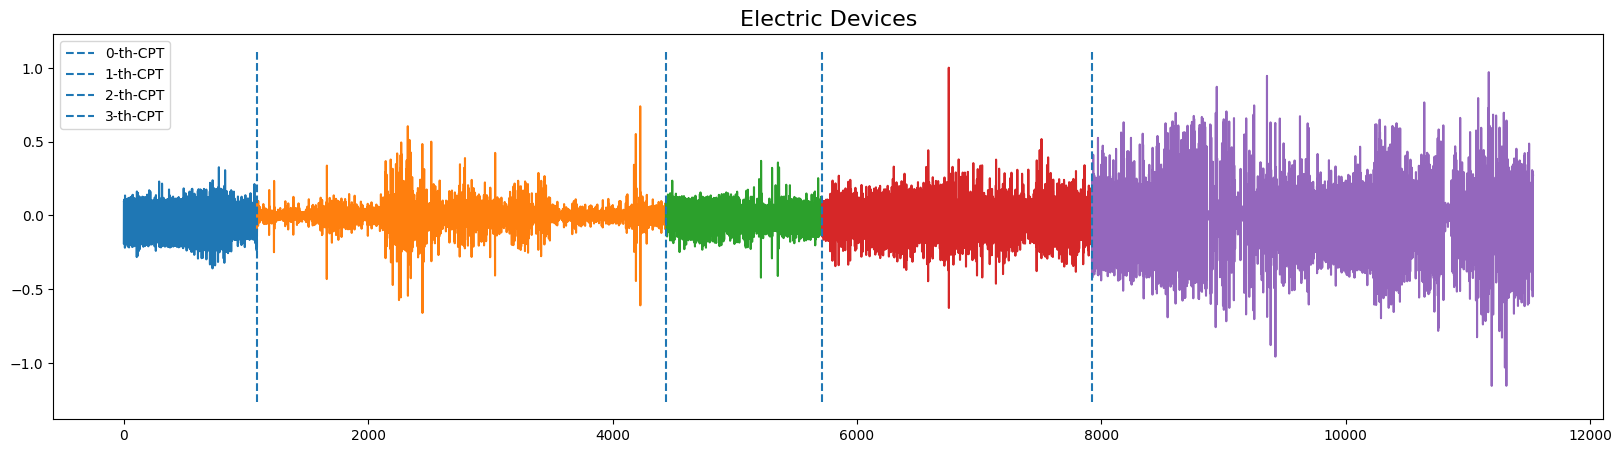

In [2]:
ts, period_size, true_cps = load_electric_devices_segmentation()
_ = plot_time_series_with_change_points("Electric Devices", ts, true_cps)

The annotated change points are around time stamps $[1090,4436,5712,7923]$, from which different electric devices are recorded.

### Kernel-based Change Point Detection with Ruptures

[1092 4464 5780 7923]
Running time: 7.529314994812012 seconds


(<Figure size 2000x500 with 1 Axes>,
 <Axes: title={'center': 'Result with Ruptures'}>)

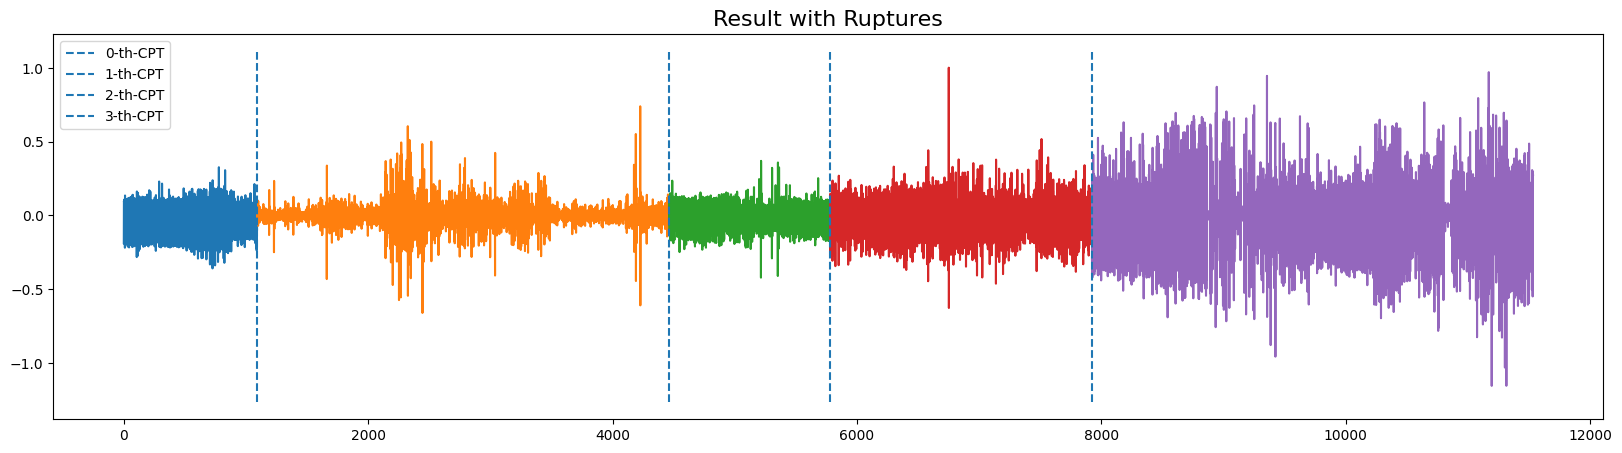

In [3]:
start_time: float = time.time()

cpd = RupturesKernelCPD(kernel="rbf", n_cps=4)
# print(ts.values.shape)
found_cps = cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

plot_time_series_with_change_points(
    "Result with Ruptures Kernel - RBF Cost", ts, found_cps
)

[ 1092  5716  9376 11329]
Running time: 1.601116418838501 seconds


(<Figure size 2000x500 with 1 Axes>,
 <Axes: title={'center': 'Result with Ruptures'}>)

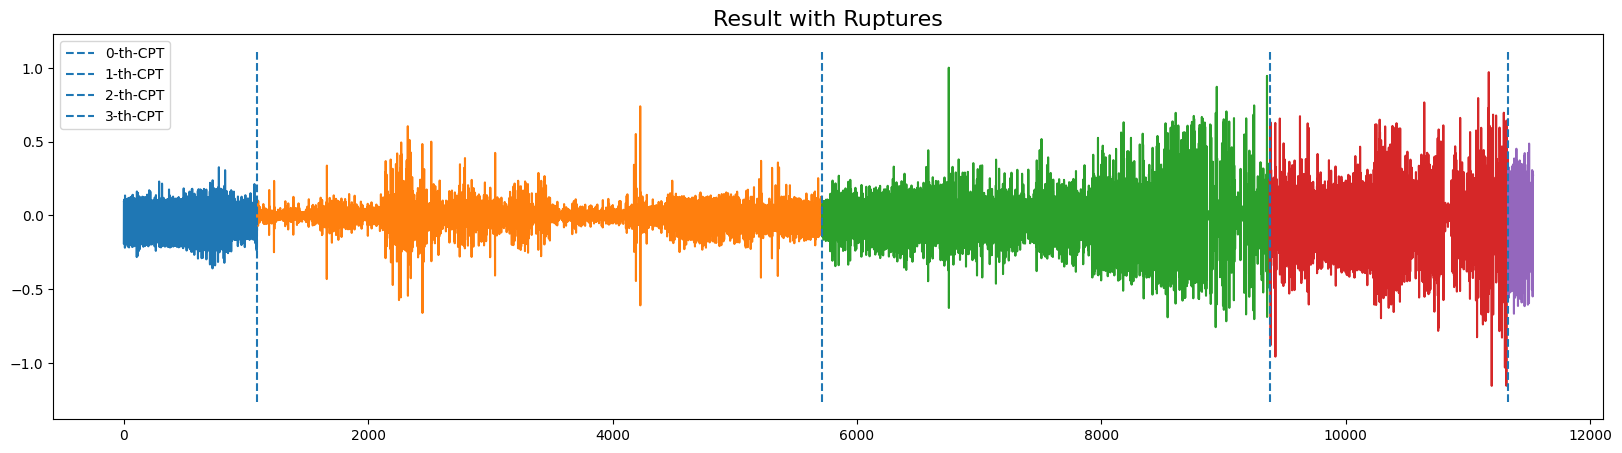

In [4]:
start_time: float = time.time()

binseg_cpd = RupturesBinsegCPD(model="rank", n_cps=4)
# print(ts.values.shape)
found_cps = binseg_cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

plot_time_series_with_change_points(
    "Result with Ruptures Bingseg - Rank Cost", ts, found_cps
)

/home/ubuntu20_1/Projects_Ubuntu20/gsoc24/time-series/ruptures/src/ruptures/costs/costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


[ 1092  9169 10800 10863]
Running time: 1.2553400993347168 seconds


(<Figure size 2000x500 with 1 Axes>,
 <Axes: title={'center': 'Result with Ruptures'}>)

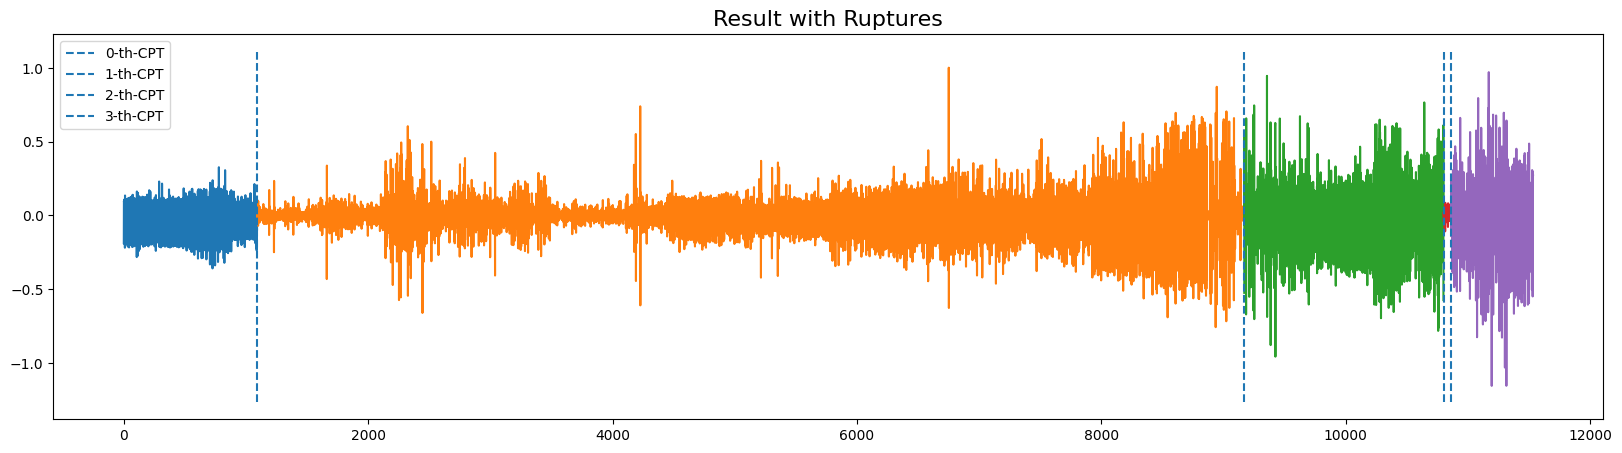

In [5]:
start_time: float = time.time()

window_cpd = RupturesWindowCPD(width=100, model="normal", n_cps=4)
# print(ts.values.shape)
found_cps = window_cpd.fit_predict(ts.values)
print(found_cps)

end_time = time.time()
print("Running time: {} seconds".format(end_time - start_time))

plot_time_series_with_change_points(
    "Result with Ruptures Window - Normal Cost", ts, found_cps
)